Definition of used functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from math import ceil

K = 9e9

##############################################################################

def E(q, r0, x, y):
    """Return the electric field vector E=(Ex,Ey) due to charge q at r0."""
    den = np.hypot(x-r0[0], y-r0[1])**3
    return q * (x - r0[0]) / den, q * (y - r0[1]) / den

##############################################################################

"""
q is the charge of each part of the dipole
p0 is the position of negative dipole
p1 is the position of positive dipole
d is the distance between the two charges of the dipole
point is a numpy array with the coordinates of the point to calculate
      the electric potencial

p0[0] is negative and is in (-d, 0)
p1[1] is positive and is in (d, 0)
"""
def electric_potential(q, r0, x, y):
    r0 = (r0[1], r0[0]) #rotates charge
    dx = x - r0[0]
    dy = y - r0[1]
    r = np.hypot(dx, dy)**2
    potential = K*q / r

    return potential * dx, potential * dy

##############################################################################

# Electric field vector, E=(Ex, Ey), as separate components
def field_vector(charges, nx, ny, X, Y):
    Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
    for charge in charges:
        ex, ey = E(*charge, x=X, y=Y)
        Ex += ex
        Ey += ey

    return Ex, Ey

##############################################################################

# Electric potential vector, electric_potential=(Ex, Ey), as separate components
def potential_vector(charges, nx, ny, X, Y):
    Ex, Ey = np.zeros((ny, nx)), np.zeros((ny, nx))
    for charge in charges:
        ex, ey = electric_potential(*charge, x=X, y=Y)
        Ex += ex
        Ey += ey

    return Ex, Ey

##############################################################################


Function to plot the potential and electric field

In [2]:
# Create a multipole with 2 charges of alternating sign, equally spaced
# on the unit circle.
nq = 2
charges = []
#Open a file with the dipole information
try:
    with open('dipole.txt') as f:
        q = [float(x) for x in next(f).split()][0] # read first line

        r0 = tuple( float(x) for x in next(f).split() ) #reads second line
        r1 = tuple(float(x) for x in next(f).split()) #reads third line
        charges.append((-np.abs(q), r0))
        charges.append((np.abs(q), r1))

except FileNotFoundError:
    #if file doesn't exist, use default dipole
    print('File does not exist. Using default dipole')

    for i in range(nq):
        q = i%2 * 2 - 1
        charges.append((q, (np.cos(2*np.pi*i/nq), np.sin(2*np.pi*i/nq))))

# Grid of x, y points
nx, ny = 126, 126
xlim = 100
ylim = 100
x = np.linspace(-xlim, xlim, nx)
y = np.linspace(-ylim, ylim, ny)
X, Y = np.meshgrid(x, y)



The electric field are the yellow-orange vector lines, the potential are the black-red lines

Charge: -1.0
Position: (1.0, 0.0)
Charge: 1.0
Position: (-1.0, 0.0)


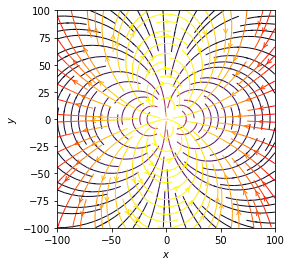

In [3]:
##Plots ################################################################
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the electric potential with an appropriate colormap and arrow style

#calculates the electric potential of the dipole in the plane
Ex, Ey = potential_vector(charges, nx, ny, X, Y)
color = 2 * np.log(np.hypot(Ex, Ey))
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap='inferno',
              density=1, arrowstyle='-', arrowsize=1)

# Plot the electric field
Ex, Ey = field_vector(charges, nx, ny, X, Y)
color = -1 - X**2 + Y
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap='autumn',
              density=1, arrowstyle='->', arrowsize=1)

# Add filled circles for the charges themselves
charge_colors = {True: '#aa0000', False: '#0000aa'}
for q, pos in charges:
    ax.add_artist(Circle(pos, 0.05, color=charge_colors[q>0]))
##############################################################################



#print the dipole information for the user
for charge in charges:
    print("Charge: {}".format(charge[0]))
    print("Position: ({}, {})".format(charge[1][0], charge[1][1]))

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-xlim, xlim)
ax.set_ylim(-ylim, ylim)
ax.set_aspect('equal')
plt.show()